## 线性回归算法基本介绍

在学习线性回归的知识点之前，我们先了解一下监督学习的概念。监督学习比较正式的定义是，给定一个训练集，学习到一个函数h：

$χ↦y$

h(x)是对对应值y的一个很好的估计,由于历史存在的问题，将这个函数h成为假设(hypothesis)。

如果我们估计的值是个连续的值，我们将我们的学习问题称为回归，如果估计的值是一个离散的值，我们将我们的学习问题成为分类。

线性回归指的是用自变量x的一次函数来估计结果y的值。


$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}+\theta_{2}x_{2}$

上述中 $\theta_{i}$为参数(也称为权重)，为了进一步简化我们的表示，我们假设 $x_0=1$,因此上式又可以写成：  

$h_{\theta}(x)=\sum_{i=0}^{n}\theta_ix_i=\theta^Tx$

给定一个数据集的情况下，怎样选择参数$\theta$，使得假设能够比较接近y呢？这里，我们引入了成本函数(cost function)，它衡量了假设和y值得接近程度，即最小平方(最小二乘法)成本函数(least square cost function)  

$J(\theta)= \frac{1}{2}\sum_{i=0}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$


### 最小均方算法(LMS, Least Mean Square)  
我们的目标是选择合适的$\theta$,去最小化成本函数$J(\theta)$。我们从一个猜想的初始$\theta$开始，逐步去更新$\theta$，使得$J(\theta)$更小，最终收敛到一个$\theta$值，使得$J(\theta)$最小。  
  
更加具体一点的是，考虑梯度下降算法(gradient descent)，从一个初始的$\theta$值开始，不断重复地去做如下的更新：  

$\theta_{j} := \theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J(\theta)$

上述的更新针对所有的$j=0,1,2...n$，这里$\alpha$是学习率，在这里每一步选择$J(\theta)$的最陡的方向进行$\theta$的更新。  

当只有一个样本的时候，有如下关系成立：

$\frac{\partial J(\theta)}{\partial \theta_{i}}=\frac{\partial}{\partial\theta_{i}}\frac{1}{2}(h_{\theta}(x)-y)^2$

$=2\cdot \frac{1}{2}(h_{\theta}(x)-y)\cdot \frac{\partial}{\partial \theta_{i}}(h_{\theta(x)}-y)$

$=(h_{\theta(x)}-y)\cdot x_{i}$


因此，当只有一个样本的时候，$\theta$的更新规则如下：

$\theta_{j} := \theta_{j}+\alpha(y^{(i)}-h_\theta(x^{(i)})x_j^{(i)}$

这个规则也叫做最小均方更新规则，这个规则看上去很自然也很直观，比如更新的幅度正比于error项$y^{(i)}-h_\theta(x^{(i)}$，当预测的值和y值比较match的时候，误差项比较小，$\theta$更新的幅度也小，当预测的值和y值相差比较大的时候，说明模型参数还没有能很好地进行目标预测，$\theta$更新的幅度也大。

当有多个样本的时候，有两种方法可以对上述规则进行扩展，第一种方法称为批量梯度下降法(batch gradient decent),具体更新规则如下：  
迭代如下公式直至收敛

$\theta_{j} := \theta_{j}+\alpha \sum_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)})x_j^{(i)}\  (for \  every \ j)$

需要注意的是，梯度下降法容易找到局部最小点，但是在这里提出的线性回归的优化问题只有一个全局的，而没有局部的最优值。因此在这里梯度下降法总是收敛到全局的最小值。在这里`$J$`是一个凸的二次函数，可以用梯度下降法去优化凸二次函数。  
第二种方法称为随机梯度下降法(stochastic gradient decent),具体更新规则如下：  
迭代如下公式：  

$
for\ i=1\ to\ m: \{ 
\theta_{j} := \theta_{j}+\alpha (y^{(i)}-h_\theta(x^{(i)})x_j^{(i)}\  (for \  every \ j)\}
$

在随机梯度下降的过程中，我们每次碰到一个样本，$\theta$更新的时候只针对当前的样本去算梯度。批量梯度下降是扫描整个数据集然后更新参数，这是一个非常耗费的运算，而随机梯度更新一次参数的运算只针对单个样本，计算很快，所以能更快的接近最值点。需要注意的是，随机梯度下降不能达到最值点，在最后会在最值点震荡，但在很多问题中这样的优化策略已经足够实用。因此在实际场景中，随机梯度下降法比批量梯度下降法更实用。

### 解析解方法的原理

Let’s apply the equations we obtained in the last section to derive the least squares equations.
Suppose we are given matrices $A\in \mathbb{R}^{m×n} $(for simplicity we assume A is full rank) and a
vector $b\in\mathbb{R}^m $` such that `$b \notin \mathfrak{R}(A).$ In this situation we will not be able to find a vector $x\in\mathbb{R}^n,$ such that $Ax = b$, so instead we want to find a vector x such that Ax is as close as
possible to b, as measured by the square of the Euclidean norm $\left \|Ax-b \right \|_2^2$ Using the fact that $ \left \| x \right \|_2^2= x^Tx$, we have

$\left \|Ax-b \right \|_2^2\newline=(Ax-b)^T(Ax-b)\newline= x^TA^TAx-x^TA^Tb-b^TAx+b^Tb\newline= x^TA^TAx-2b^TAx+b^Tb$

Taking the gradient with respect to x we have, and using the properties we derived in the previous section

$\bigtriangledown_x(x^TA^TAx-2b^TAx+b^Tb)\newline=2A^TAx-2A^Tb$

Setting this last expression equal to zero and solving for x gives the normal equations

$x=(A^TA)^{-1}A^Tb$

[解析解完整的代码实现](./Linear_Regression_Analysis_Solution.ipynb)


### 线性回归的概率解释：

当面临线性回归的时候，为什么将最小二乘作为成本函数是合适的呢？在本部分，将给出一个概率解释，就理解为什么最小二乘作为线性回归的成本函数是很自然的一个算法。假设我们的目标变量和输入变量通过如下的等式关联起来:
  
  $y^{(i)}=\theta ^T x^{(i)}+\epsilon ^{(i)}$

  其中$\epsilon ^{(i)}$为误差项，可以将误差归结为是由于没有纳入到建模中的一些变量（特征），或者仅仅是由于噪声引起的。我们进一步假设$\epsilon ^{(i)}$服从IID(independently and identically distributed)的均值为0，方差为$\sigma$的高斯分布，写作 $\epsilon ^{(i)}\sim N(0,\sigma^2)$ 。$\epsilon ^{(i)}$ 的概率密度为：
  
$p(\epsilon^{(i)})=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(\epsilon^{(i)})^2}{2\sigma^2})$

因此下面的等式也会成立：
  
$p(y^{(i)}|x^{(i)};\theta)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$

  给定一个数据集，它的似然函数(样本的联合分布)可以表示为：
  
$L(\theta)=L(\theta;X,\vec y)=p(\vec y |X;\theta)$

   由于我们假设$\epsilon ^{(i)}$服从IID的高斯分布，因此上述的公式也可以写为:
   
$L(\theta)=\prod_{i=1}^{m}p(y^{(i)}|x^{(i)};\theta)=\prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$
  现在我们考虑怎么选择合适的$\theta$来最大化$L(\theta)$。这里面我们采用了一个等价的方法，通过最大化$logL(\theta)$

$l(\theta)=logL(\theta)$

$= log\prod_{i=1}^{m}\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$

$= \sum_{i=1}^{m}log\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$

$= mlog\frac{1}{\sqrt{2\pi}\sigma}-\frac{1}{\sigma^2}\frac{1}{2}\sum_{i=1}^{m}(y^{(i)}-\theta^Tx^{(i)})^2$

根据上式，最大化$l(\theta)$也就是最小化$\frac{1}{2}\sum_{i=1}^{m}(y^{(i)}-\theta^Tx^{(i)})^2$


### 基于算法原理原生从零开始进行实验

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import time
import copy

#### 生成实验模拟数据集

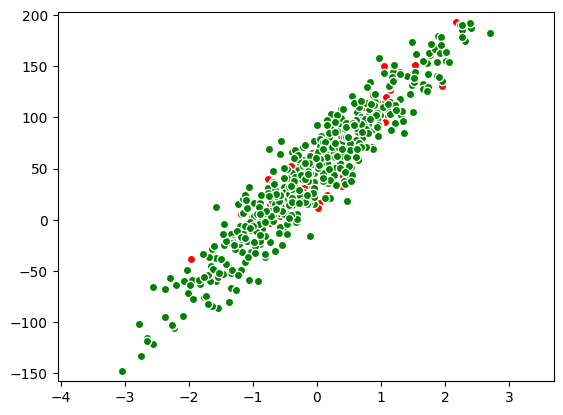

Coef=56.8217593669845


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

'''
make dummy regression data
sklearn.datasets.make_regression 

params:
    @random_state, int or None
    随机数状态,类似random seed,在多次的不同调用中可以传入相同的数来生成可重复的输出
    
    @n_samples : int, optional (default=1)
    回归的目标数目，也就是回归的目标结果的维度，默认是一个标量数字(1维)

    @n_features : int, optional (default=100) 特征数，这里为1，说明为x,y二维数据
    
    @noise : float, optional (default=0.0),
    生成的数据并不是完全理想的拟合回归模型的数据,而是带有高斯噪声的,noise变量定义了高斯噪声的标准差
    The standard deviation of the gaussian noise applied to the output.

    bias为偏置,intercept,

    coef为系数,返回系数。bias为50为已经给定的具体的值，
'''

X, Y, Coef = datasets.make_regression(n_samples=600, n_features=1, noise=20, random_state=0, bias=50, coef=True)

'''
按照一定的比例随机切分训练集和测试集
sklearn.model_selection.train_test_split
params
    @test_size:如果是浮点数,在0-1之间,表示样本占比;如果是整数的话就是样本的数量
'''

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1, random_state=0)
X0_train = np.ones([X_train.shape[0],1],dtype=X_train.dtype)
X0_test = np.ones([X_test.shape[0],1], dtype=X_test.dtype)
X_train_original = copy.deepcopy(X_train)

# 拼接数据
X_train = np.concatenate((X0_train, X_train), axis=1)
X_test = np.concatenate((X0_test, X_test), axis=1)

# show data
plt.scatter(X_test[:,1], Y_test, c='red', edgecolors='white')
plt.scatter(X_train[:,1], Y_train, c='green', edgecolors='white')
plt.ylim((Y.min()-10, Y.max()+10))
plt.xlim((X.min()-1, X.max()+1))
plt.show()
print('Coef={}'.format(Coef))


### 基于Mini Batch的SGD算法原生实现

In [4]:
test = np.zeros([2,1], dtype=np.float32)
print(test.shape)

(2, 1)


[0/3, loss: 154285.04508909627, Weight: 58.851701198081656, Bias:47.58667393109701]
[1/3, loss: 56189.87576484548, Weight: 59.11776320176755, Bias:47.889867418184]
[2/3, loss: 55937.17903077366, Weight: 59.11910016276339, Bias:47.89163154198456]


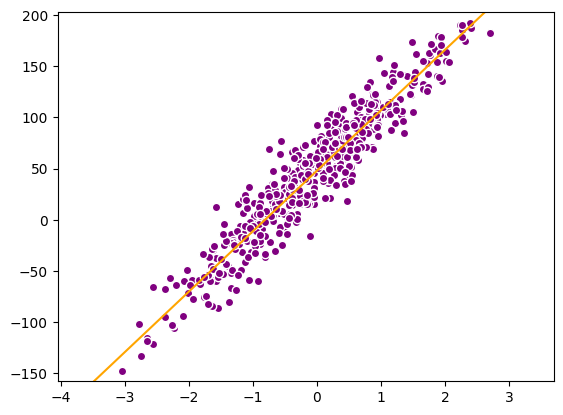

In [3]:
import matplotlib.animation as animation
import copy
#import pdb
#pdb.set_trace()

#learnable parameter theta，参数theta为两个变量，theta0，和theta1
# 矩阵形式 (2, 1)
THETA = np.zeros([2,1], dtype=np.float32)
# learning rate
lr = 0.02
epoch = 3

#plt.ion()
thetas = []
ln = None
'''
linspace,Return evenly spaced numbers over a specified interval.
在闭区间[2, 3]生成5个间隔相同的数字
print(np.linspace(2.0, 3.0, num=5))
[2.   2.25 2.5  2.75 3.  ]
'''

p_x = np.linspace(X.min()-1, X.max()+1, 50)
fig = plt.figure()
plt.scatter(X_train[:,1], Y_train, c='purple', marker='o', edgecolors='white')
ln, = plt.plot(p_x, THETA[1,0]*p_x+THETA[0,0], c='orange')

def init():
    plt.ylim((Y.min()-10, Y.max()+10))
    plt.xlim((X.min()-1, X.max()+1))    
    return ln,

'''
numpy中的乘法
元素相乘:multply()
矩阵相乘:dot()、matmul()、’@'*': 是特别的。在数组操作中，作为元素相乘；在矩阵操作中作为矩阵相乘。
batch_X
[[ 1.          1.        ]
    [ 0.37642553 -1.16514984]]

batch-Y
[[ 85.83865632]
    [-45.48857996]]
theta
[[0.40350076]
    [0.85312873]]
loss
[[2359.37145637 2359.37145637]]

'''
def h(theta, X):
    # theta.T为一行元素的矩阵，X为列向量拼接的数据，一列数据一个样本，支持多个样本形成的mini batch数据
    # 1*n和n*m(m为样本数量)的矩阵相乘得到1*m个结果的矩阵
    h_x = np.matmul(theta.T,X)
    #import pdb
    #pdb.set_trace()
    return h_x

# Y为m*1 matrix，Y.T.shape=(1,m), [1,m]和[m,1]的矩阵相乘得出cost
def loss_function(theta, X, Y):
    cost = 1/2*np.matmul((h(theta,X)-Y.T),(h(X,theta)-Y.T).T)
    return cost/(X.shape[0]) #平均cost

# child block matrix trick using multiply functions
# X.T.shape = m*n（m为样本数量），相当于m个样本的数据
# h(theta,X)-Y.T的shape为(1,m),转置为(m,1)，相当于样本数量个残差
# np.multiply具有广播功能，结果为[m,n]形状的矩阵
# 在第一个维度求平均，得到平均的梯度，且称为n=2的向量
def gradient(theta,X, Y):
    gradient = np.multiply(X.T,(h(theta,X)-Y.T).T)
    return gradient.mean(axis=0).T

#梯度下降算法
def update_parameters(theta, gradient, lr):
    theta = theta-lr*gradient
    return theta

def update(frame):
    #xdata.append(frame)
    #ydata.append(np.shin(frame))
    Y = frame[1,0]*p_x+frame[0,0]
    ln.set_data(p_x, Y)
    return ln,

for ep in range(epoch):
    loss = 0
    for index in range(X_train.shape[0]//2):
        batch_X = X_train[index*2:(index+1)*2,:].T # 2*2 matrix
        batch_Y = Y_train[index*2:(index+1)*2].reshape([2,1])# 2*1 matrix
        h_X = h(THETA, batch_X) # 1*2 matrix
        loss += loss_function(THETA, batch_X, batch_Y)
        g = gradient(THETA, batch_X, batch_Y)
        g = g.reshape([2,1])
        THETA = update_parameters(THETA, g, lr)
        theta = copy.deepcopy(THETA)
        thetas.append(theta)
    avg_loss = loss.mean()
    print(f"[{ep}/{epoch}, loss: {avg_loss}, Weight: { THETA[1,0]}, Bias:{THETA[0,0]}]")
        #import IPython
        #IPython.embed(colors="Linux")
        #plt.cla()
        #plt.scatter(X_train[:,1], Y_train, c='purple', marker='o', edgecolors='white')
        #plt.plot(p_x, THETA[1,0]*p_x+THETA[0,0], c='orange')
        #plt.pause(0.01)
        # ims.append(im)
#plt.ioff()
anim = animation.FuncAnimation(fig, update,frames=thetas,interval=100,init_func=init, blit=True)
# plt.show()
#anim.save("/kaggle/working/linear_regression_demo.gif",writer='pillow')
# ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
anim.save("./sgd_linear_regression.gif",writer='pillow')

### 采用pytorch框架进行线性回归实验

Epoch [4/5], Loss: 210.0708
Epoch [4/5], Loss: 210.1428
Epoch [4/5], Loss: 210.1428
Epoch [4/5], Loss: 210.1428
Epoch [4/5], Loss: 210.1428


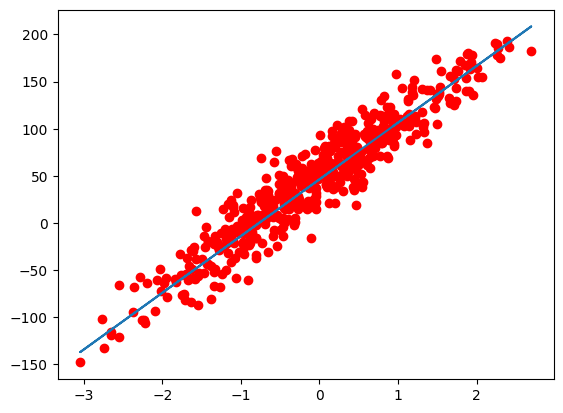

In [12]:
#%load_ext tensorboard
#%tensorboard --logdir ./

import torch
import torch.nn as nn
import time

train_log_filepath = "./train_log.txt"
train_log_txt_formatter = "{time_str} [Epoch] {epoch:03d} [Loss] {loss_str}\n"

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(1,1)
model = model.double()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
num_epoches = 5
for epoche in range(num_epoches):
    for index in range(X_train_original.shape[0]//2):
        batch_X = X_train_original[index*2:(index+1)*2,:]
        batch_Y = Y_train[index*2:(index+1)*2].reshape([2,1])
        inputs = torch.from_numpy(batch_X)
        targets = torch.from_numpy(batch_Y)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs,targets)
        loss.backward()
        optimizer.step()
    #if (epoch+1) % 5 == 0:
    print ('Epoch [%d/%d], Loss: %.4f' 
           %(epoch+1, num_epoches, loss.item()))
    to_write = train_log_txt_formatter.format(time_str=time.strftime("%Y_%m_%d_%H:%M:%S"),
                                          epoch = epoch,
                                          loss_str=loss.item())
    with open(train_log_filepath, "a") as f:
        f.write(to_write)
predicted = model(torch.from_numpy(X_train_original)).data.numpy()
plt.plot(X_train_original, Y_train, 'ro', label='Original data')
plt.plot(X_train_original, predicted, label='Fitted line')
plt.show()


### 开源实现参考
- [100-Days-Of-ML-Code](https://github.com/Avik-Jain/100-Days-Of-ML-Code)
- [numpy-ml](https://github.com/ddbourgin/numpy-ml)

下面的代码借鉴自：https://github.com/ddbourgin/numpy-ml/blob/master/numpy_ml/linear_models/linear_regression.py

In [13]:
class LinearRegression:
    def __init__(self, fit_intercept=True):
        r"""
        A weighted linear least-squares regression model.

        Notes
        -----
        In weighted linear least-squares regression [1]_, a real-valued target
        vector, **y**, is modeled as a linear combination of covariates, **X**,
        and model coefficients, :math:`\beta`:

        .. math::

            y_i = \beta^\top \mathbf{x}_i + \epsilon_i

        In this equation :math:`\epsilon_i \sim \mathcal{N}(0, \sigma^2_i)` is
        the error term associated with example :math:`i`, and
        :math:`\sigma^2_i` is the variance of the corresponding example.

        Under this model, the maximum-likelihood estimate for the regression
        coefficients, :math:`\beta`, is:

        .. math::

            \hat{\beta} = \Sigma^{-1} \mathbf{X}^\top \mathbf{Wy}

        where :math:`\Sigma^{-1} = (\mathbf{X}^\top \mathbf{WX})^{-1}` and
        **W** is a diagonal matrix of weights, with each entry inversely
        proportional to the variance of the corresponding measurement. When
        **W** is the identity matrix the examples are weighted equally and the
        model reduces to standard linear least squares [2]_.

        References
        ----------
        .. [1] https://en.wikipedia.org/wiki/Weighted_least_squares
        .. [2] https://en.wikipedia.org/wiki/General_linear_model

        Parameters
        ----------
        fit_intercept : bool
            Whether to fit an intercept term in addition to the model
            coefficients. Default is True.

        Attributes
        ----------
        beta : :py:class:`ndarray <numpy.ndarray>` of shape `(M, K)` or None
            Fitted model coefficients.
        sigma_inv : :py:class:`ndarray <numpy.ndarray>` of shape `(N, N)` or None
            Inverse of the data covariance matrix.
        """
        # beta参数
        # 
        self.beta = None
        self.sigma_inv = None
        self.fit_intercept = fit_intercept

        self._is_fit = False

    def update(self, X, y, weights=None):
        r"""
        Incrementally update the linear least-squares coefficients for a set of
        new examples.

        Notes
        -----
        The recursive least-squares algorithm [3]_ [4]_ is used to efficiently
        update the regression parameters as new examples become available. For
        a single new example :math:`(\mathbf{x}_{t+1}, \mathbf{y}_{t+1})`, the
        parameter updates are

        .. math::

            \beta_{t+1} = \left(
                \mathbf{X}_{1:t}^\top \mathbf{X}_{1:t} +
                    \mathbf{x}_{t+1}\mathbf{x}_{t+1}^\top \right)^{-1}
                        \mathbf{X}_{1:t}^\top \mathbf{Y}_{1:t} +
                            \mathbf{x}_{t+1}^\top \mathbf{y}_{t+1}

        where :math:`\beta_{t+1}` are the updated regression coefficients,
        :math:`\mathbf{X}_{1:t}` and :math:`\mathbf{Y}_{1:t}` are the set of
        examples observed from timestep 1 to *t*.

        In the single-example case, the RLS algorithm uses the Sherman-Morrison
        formula [5]_ to avoid re-inverting the covariance matrix on each new
        update. In the multi-example case (i.e., where :math:`\mathbf{X}_{t+1}`
        and :math:`\mathbf{y}_{t+1}` are matrices of `N` examples each), we use
        the generalized Woodbury matrix identity [6]_ to update the inverse
        covariance. This comes at a performance cost, but is still more
        performant than doing multiple single-example updates if *N* is large.

        References
        ----------
        .. [3] Gauss, C. F. (1821) *Theoria combinationis observationum
           erroribus minimis obnoxiae*, Werke, 4. Gottinge
        .. [4] https://en.wikipedia.org/wiki/Recursive_least_squares_filter
        .. [5] https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula
        .. [6] https://en.wikipedia.org/wiki/Woodbury_matrix_identity

        Parameters
        ----------
        X : :py:class:`ndarray <numpy.ndarray>` of shape `(N, M)`
            A dataset consisting of `N` examples, each of dimension `M`
        y : :py:class:`ndarray <numpy.ndarray>` of shape `(N, K)`
            The targets for each of the `N` examples in `X`, where each target
            has dimension `K`
        weights : :py:class:`ndarray <numpy.ndarray>` of shape `(N,)` or None
            Weights associated with the examples in `X`. Examples
            with larger weights exert greater influence on model fit.  When
            `y` is a vector (i.e., `K = 1`), weights should be set to the
            reciporical of the variance for each measurement (i.e., :math:`w_i
            = 1/\sigma^2_i`). When `K > 1`, it is assumed that all columns of
            `y` share the same weight :math:`w_i`. If None, examples are
            weighted equally, resulting in the standard linear least squares
            update.  Default is None.

        Returns
        -------
        self : :class:`LinearRegression <numpy_ml.linear_models.LinearRegression>` instance
        """  # noqa: E501
        if not self._is_fit:
            raise RuntimeError("You must call the `fit` method before calling `update`")

        #  numpy的atleast_2d函数确保输入数组至少是 二维数组（2D）。如果输入本身已经是二维或更高维的数组，则不会改变其结构；如果是一维或零维的，则会添加维度将其扩展为二维。
        #  a = np.atleast_2d(3) -》  [[3]]
        #  a = np.atleast_2d([1, 2, 3]) -》[[1 2 3]]
        X, y = np.atleast_2d(X), np.atleast_2d(y)

        X1, Y1 = X.shape[0], y.shape[0]
        weights = np.ones(X1) if weights is None else np.atleast_1d(weights)
        weights = np.squeeze(weights) if weights.size > 1 else weights

        err_str = f"weights must have shape ({X1},) but got {weights.shape}"
        assert weights.shape == (X1,), err_str

        # scale X and y by the weight associated with each example
        W = np.diag(np.sqrt(weights))
        X, y = W @ X, W @ y

        self._update1D(X, y, W) if X1 == Y1 == 1 else self._update2D(X, y, W)
        return self

    def _update1D(self, x, y, w):
        """Sherman-Morrison update for a single example"""
        beta, S_inv = self.beta, self.sigma_inv

        # convert x to a design vector if we're fitting an intercept
        if self.fit_intercept:
            x = np.c_[np.diag(w), x]

        # update the inverse of the covariance matrix via Sherman-Morrison
        S_inv -= (S_inv @ x.T @ x @ S_inv) / (1 + x @ S_inv @ x.T)

        # update the model coefficients
        beta += S_inv @ x.T @ (y - x @ beta)

    def _update2D(self, X, y, W):
        """Woodbury update for multiple examples"""
        beta, S_inv = self.beta, self.sigma_inv

        # convert X to a design matrix if we're fitting an intercept
        if self.fit_intercept:
            X = np.c_[np.diag(W), X]

        I = np.eye(X.shape[0])  # noqa: E741

        # update the inverse of the covariance matrix via Woodbury identity
        S_inv -= S_inv @ X.T @ np.linalg.pinv(I + X @ S_inv @ X.T) @ X @ S_inv

        # update the model coefficients
        beta += S_inv @ X.T @ (y - X @ beta)

    def fit(self, X, y, weights=None):
        r"""
        Fit regression coefficients via maximum likelihood.

        Parameters
        ----------
        X : :py:class:`ndarray <numpy.ndarray>` of shape `(N, M)`
            A dataset consisting of `N` examples, each of dimension `M`.
            N个样本,M的属性,设计矩阵
        y : :py:class:`ndarray <numpy.ndarray>` of shape `(N, K)`
            The targets for each of the `N` examples in `X`, where each target
            has dimension `K`.
            N个样本真值,K个值
        weights : :py:class:`ndarray <numpy.ndarray>` of shape `(N,)` or None
            Weights associated with the examples in `X`. Examples
            with larger weights exert greater influence on model fit.  When
            `y` is a vector (i.e., `K = 1`), weights should be set to the
            reciporical of the variance for each measurement (i.e., :math:`w_i
            = 1/\sigma^2_i`). When `K > 1`, it is assumed that all columns of
            `y` share the same weight :math:`w_i`. If None, examples are
            weighted equally, resulting in the standard linear least squares
            update.  Default is None.
            样本权重，加权线性回归。
            reciprocal为倒数的意思。

        Returns
        -------
        self : :class:`LinearRegression <numpy_ml.linear_models.LinearRegression>` instance
        """  # noqa: E501
        # N为样本个数
        N = X.shape[0]
       
        
        #为普通的等权重的线性回归，其权重数量要和样本数量一致
        weights = np.ones(N) if weights is None else np.atleast_1d(weights)
        weights = np.squeeze(weights) if weights.size > 1 else weights
        err_str = f"weights must have shape ({N},) but got {weights.shape}"
        assert weights.shape == (N,), err_str

        # scale X and y by the weight associated with each example
        # 在加权最小二乘中，为了将加权问题转换为标准最小二乘问题，需要对数据进行变换。
        # 标准的 WLS 目标是最小化 sum(w_i * (y_i - x_i*beta)^2)。
        # 这等价于最小化 sum((sqrt(w_i) * y_i - sqrt(w_i) * x_i*beta)^2)。这里的 W 矩阵就是用于实现这个 sqrt(w_i) 变换的
        # 相当于在变换后生成的X，y上做一般标准的线性回归算法
        W = np.diag(np.sqrt(weights))
        X, y = W @ X, W @ y

        # convert X to a design matrix if we're fitting an intercept
        # np.c_相当于concatenate操作，用于连接两个矩阵，如果为一般的线性回归，偏置项对应的值为1
        if self.fit_intercept:
            X = np.c_[np.sqrt(weights), X]

        print(X.shape)

        #计算X.T @ X的伪逆，最小二乘正规方程所得解的 (X^T X)^-1 X^T y 中的 X^T X 部分
        self.sigma_inv = np.linalg.pinv(X.T @ X)
        #整个正规方程所得参数的解
        self.beta = np.atleast_2d(self.sigma_inv @ X.T @ y)

        self._is_fit = True
        return self

    def predict(self, X):
        """
        Use the trained model to generate predictions on a new collection of
        data points.

        Parameters
        ----------
        X : :py:class:`ndarray <numpy.ndarray>` of shape `(Z, M)`
            A dataset consisting of `Z` new examples, each of dimension `M`.

        Returns
        -------
        y_pred : :py:class:`ndarray <numpy.ndarray>` of shape `(Z, K)`
            The model predictions for the items in `X`.
        """
        # np.c_ 用于连接两个矩阵
        # c表示columns，按列拼接，应该是使列的数量增加；r表示rows，按行拼接，使行数增加。
        #这个函数和numpy.vstack，numpy.hstack的功能相同！！！
        # convert X to a design matrix if we're fitting an intercept
        # @ python3.5后的新运算符,它与numpy.dot（）的作用是一样的，矩阵乘法
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        print(X.shape, self.beta.shape)
        return X @ self.beta.T

(540, 2)
(60, 2) (1, 2)


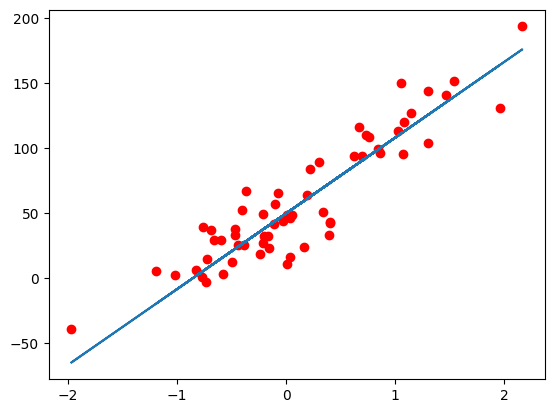

[[49.9006743 58.2017104]]


In [14]:
LR = LinearRegression()
#print(X_train.shape,X_train_original.shape, Y_train.shape)
LR.fit(X_train_original, Y_train)

predicted = LR.predict(X_test[:,1])
plt.plot(X_test[:,1], Y_test, 'ro', label='Original data')
plt.plot(X_test[:,1], predicted, label='Fitted line')
plt.show()
print(LR.beta)

In [20]:
# Step 1: Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('../../datasets/studentscores.csv')
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

### 使用SkLearn机器学习库中提供的机器学习算法实验

In [21]:
# Step2:Step 2: Fitting Simple Linear Regression Model to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [22]:
# Step 3: Predecting the Result
Y_pred = regressor.predict(X_test)

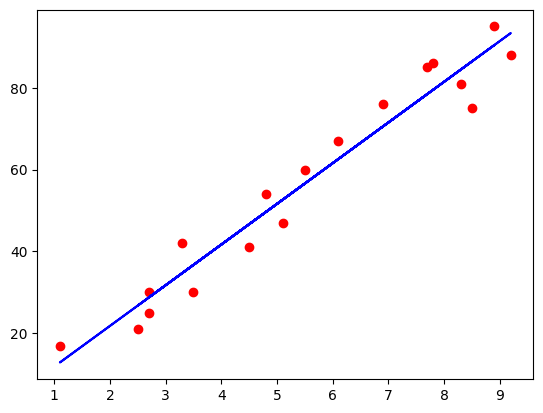

In [23]:
#Step 4: Visualization
#Visualising the Training results
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

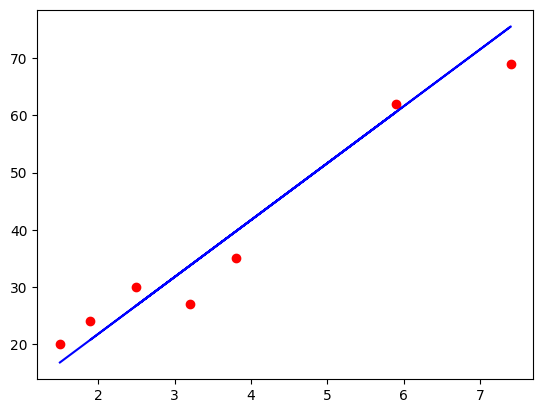

In [24]:
#Visualizing the test results
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')